# Statistical Thinking in Python (Part 1)

👋 Welcome to your workspace! Here, you can write and run Python code and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). Below, we've imported the datasets from the course _Statistical Thinking in Python (Part 1)_ as DataFrames as well as the packages used in the course. This is your sandbox environment: analyze the course datasets further, take notes, or experiment with code!

In [3]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
belmont = pd.read_csv('datasets/belmont.csv')
michelson = pd.read_csv('datasets/michelson_speed_of_light.csv', index_col=0)
all_states = pd.read_csv('datasets/2008_all_states.csv')
swing_states = pd.read_csv('datasets/2008_swing_states.csv')

# belmont.head() # Display the first five rows
# michelson.head()
all_states.head(10)
# swing_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west
5,AK,"State House District 16, Chugiak-South Mat-",10697,2636,7774,287,25.32,west
6,AK,"State House District 15, Rural Mat-Su",11086,2510,8227,349,23.38,west
7,AK,"State House District 39, Bering Straits",5184,2695,2323,166,53.71,west
8,AK,"State House District 40, Arctic",5000,2137,2686,177,44.31,west
9,AK,"State House District 2, Sitka-Wrangell-Pete",7735,3468,4029,238,46.26,west


### Don't know where to start?

Try completing these tasks:
- Pick five states from `all_states` and create a bee swarm plot of the votes in those states. Each point should represent the share of the vote Obama got in a single country (`dem_share`), segmented by state.
- Compute the variance and standard variance of `dem_share` for each state in `swing_states`.
- Take 10,000 samples out of the normal distribution with the mean and standard deviation of the Belmont winners' times and plot it. This will require you to clean the `Time` column to be numeric. 
- Check the normality of the Michelson measurements, specifically velocity of light in air, by plotting the theoretical and empirical CDFs on the same plot.

In [4]:
# mean 
import numpy as np
mean = np.mean(all_states['total_votes'])
print("Mean:", mean)
# median
median = np.median(all_states['total_votes'])
print("Median:", median)
# mode
mode = all_states['total_votes'].value_counts()
print("Mode:", mode)

Mean: 41710.12559467174
Median: 10868.0
Mode: 1440     3
6036     3
2980     3
9097     2
2241     2
        ..
3431     1
7529     1
3435     1
63215    1
5453     1
Name: total_votes, Length: 3019, dtype: int64


In [5]:
# Using np.var() for variance
var_ddof = np.var(all_states['total_votes'], ddof=1)
print("Variance with ddof:", var_ddof)

# Without ddof=1 , population variance is calculated instead of sample variance:
var_noddof = np.var(all_states['total_votes'])
print("Variance with ddof:", var_noddof)

Variance with ddof: 14226695724.640312
Variance with ddof: 14222183610.55067


In [6]:
#standard deviation
sd = np.std(all_states['total_votes'], ddof=1)
print("Standard Deviation:", sd)

Standard Deviation: 119275.71305441989


Quartile: [ 5.03 31.98 41.77 51.28 93.43]


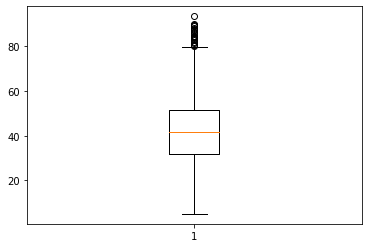

In [7]:
qua = np.quantile(all_states['dem_share'], [0, 0.25, 0.5, 0.75, 1])
print("Quartile:", qua)

# Boxplots use quartiles
import matplotlib.pyplot as plt
plt.boxplot(all_states['dem_share'])
plt.show()

In [8]:
# Interquartile Range(IQR):
from scipy.stats import iqr
iqrange =iqr(all_states['total_votes'])
print("Interquartile Range(IQR)", iqrange)

Interquartile Range(IQR) 23547.0


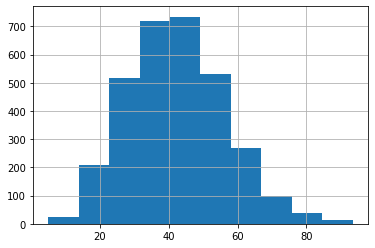

Less than 74.43: 0.13263959332622155
More than 38.62: 0.9999999999999999
between 74.43 - 38.62: 0.1326395933262215


In [9]:
all_states['dem_share'].hist(bins=10)
plt.show()

# What percent vote Obama got in a single country(dem_share) is less than 74.43?
from scipy.stats import norm
less = norm.cdf(74.43, 80.0, 5)
print("Less than 74.43:", less)

# What percent vote Obama got in a single country(dem_share) is more than 38.62?
from scipy.stats import norm
more = 1 - norm.cdf(38.62, 80.0, 5)
print("More than 38.62:", more)

# What percent vote Obama got in a single country(dem_share) are 74.43 - 38.62?
both = norm.cdf(74.43, 80.0, 5) - norm.cdf(38.62, 80.0, 5)
print("between 74.43 - 38.62:", both)

In [10]:
mode = all_states['dem_share'].value_counts()
print("Mode:", mode)

Mode: 46.46    6
38.62    4
44.65    4
43.73    4
51.10    4
        ..
25.56    1
39.31    1
74.43    1
57.71    1
42.89    1
Name: dem_share, Length: 2363, dtype: int64


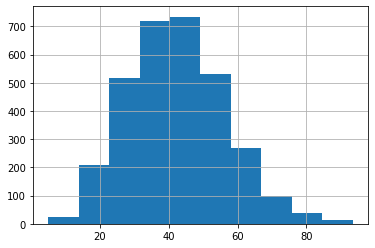

41.749


In [11]:
all_states['dem_share'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)
# Sample 20 num_users with replacement from amir_deals
samp_20 = all_states['dem_share'].sample(20, replace = True)

# Take mean of samp_20
print(np.mean(samp_20))

In [13]:
# Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = all_states['dem_share'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = all_states['dem_share'].sample(20, replace = True)
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means
    sample_means.append(samp_20_mean)
  
print(sample_means)

[42.536500000000004, 45.39149999999999, 41.20349999999999, 48.602500000000006, 37.98950000000001, 42.324999999999996, 38.1755, 41.166, 39.3435, 40.767, 44.1155, 46.366, 43.754, 40.144, 39.24900000000001, 35.80800000000001, 51.1375, 35.090999999999994, 38.858, 39.7565, 44.167, 47.2905, 38.545, 41.832499999999996, 43.64300000000001, 44.6555, 42.172000000000004, 41.05050000000001, 38.991, 41.551, 44.338, 48.705499999999994, 44.708000000000006, 41.315000000000005, 46.177, 41.82900000000001, 44.44449999999999, 41.982499999999995, 46.07750000000001, 39.5475, 42.653000000000006, 37.74849999999999, 47.973499999999994, 39.5535, 42.776500000000006, 42.3035, 46.207, 47.75, 43.7915, 45.500499999999995, 43.4645, 41.95, 46.602500000000006, 44.74849999999999, 48.703500000000005, 39.435500000000005, 42.979000000000006, 44.237, 46.136500000000005, 42.403, 37.370999999999995, 39.4435, 37.226, 40.764, 46.37850000000001, 40.6065, 38.1995, 41.9825, 40.964999999999996, 41.566, 40.73400000000001, 37.42449999

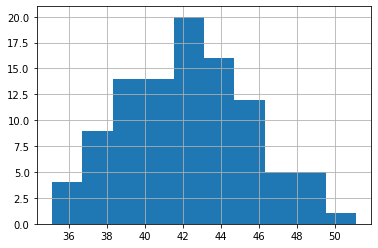

In [14]:
# Convert sample_means into a pd.Series, create a histogram of the sample_means, and showing the plot.
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = all_states['dem_share'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [15]:
# Import poisson from scipy.stats and calculate the probability that Obama gets 55 votes in each country, given that he has an average of 40 votes.
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 55 votes
prob_5 = poisson.pmf(55, 45)
print("Probability of 55 votes: ",prob_5)

# #Probability that Obama's competitor have an average of 350 votes. What is the probability thatthey have 500 vote ?
# # Probability of 500 responses
prob_competitor = poisson.pmf(500, 350)
print("Probability competitor have 500 votes: ",prob_competitor)

Probability of 55 votes:  0.01904389862124531
Probability competitor have 500 votes:  8.801262494551509e-15


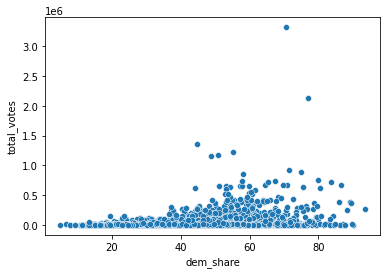

Total Votes vs Dem share: 0.2862004837881379
Dem share vs Total Votes: 0.2862004837881379


In [16]:
# Correlation
import seaborn as sns
sns.scatterplot(y="total_votes", x="dem_share", data=all_states)
plt.show()

first = all_states['total_votes'].corr(all_states['dem_share'])
print("Total Votes vs Dem share:", first)

sec = all_states['dem_share'].corr(all_states['total_votes'])
print("Dem share vs Total Votes:", sec)

In [18]:
# Linear regression by least squares
# Least squares :The process of finding the parameter for which the sum of the square is minimal
import numpy as np
slope, intercept = np.polyfit(all_states["total_votes"], all_states['dem_share'], 1)
print("Slope:",slope)
print("Interept", intercept)

Slope: 3.3705536864531573e-05
Interept 40.808790535847685


In [23]:
michelson = pd.read_csv('datasets/michelson_speed_of_light.csv', index_col=0)
michelson.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [25]:
newcomb_value = 299860 # km/s
michelson_speed_of_light = 299852 # km/s
michelson_shifted = michelson_speed_of_light
- np.mean(michelson_speed_of_light) + newcomb_value

8.0

In [27]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value
diff_obs = diff_from_newcomb(michelson_speed_of_light)
diff_obs


-8.0

In [28]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_observed) / 10000
p_value

NameError: name 'draw_bs_reps' is not defined